# Tratar dados 'tempo.csv'

Aparência: sol, nublado, chuva

Temperatura: -135 ~ 130 F

Umidade: 0 ~ 100

Jogar: sim/nao

Tratar valores NAs

In [280]:
#bibliotecas
import pandas as pd
import seaborn as srn
import statistics  as sts

In [281]:
#importar dados
dataset = pd.read_csv("tempo.csv", sep=";")
#visulizar
dataset.head()


,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [282]:
#tamanho
dataset.shape

(14, 5)

Podemos notar que se trata de uma dataset bem pequeno em quantidade de colunas e linhas, mas que demonstra de maneira bem clara os desafios do dia a dia de com uma das tarefas mais comuns na vida de um cientista de dados, a limpeza de dados.
 
O primeiro passo é realizar uma análise exploratória dos dados, para entender melhor com o que estamos lidando.

In [283]:
#explorar dados categoricos
#Aparencia
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<AxesSubplot:xlabel='Aparencia'>

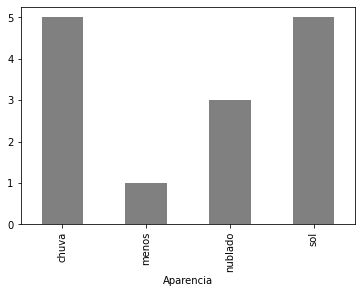

In [284]:
#Logo de início podemos notar uma inconsistencia nos dados relacionados a Aparência
agrupado.plot.bar(color = 'gray')

In [285]:
#Temperatura
agrupado = dataset.groupby(['Temperatura']).size()
agrupado


Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

<AxesSubplot:xlabel='Temperatura'>

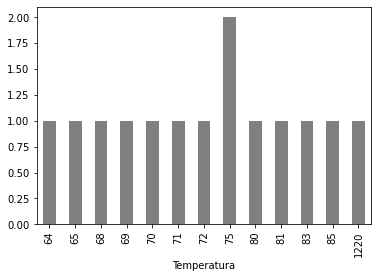

In [286]:
#Também é possivel notar dados fora do domínio na coluna Temperatura, indicando uma temperatura de 1200
agrupado.plot.bar(color = 'gray')

In [287]:
#explorar dados categoricos
#Umidade
agrupado = dataset.groupby(['Umidade']).size()
agrupado

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

<AxesSubplot:xlabel='Umidade'>

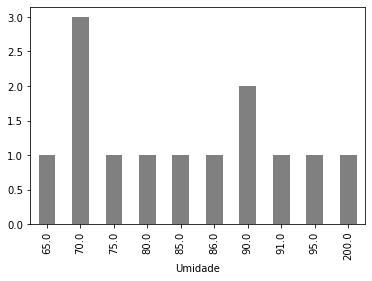

In [288]:
#Na Umidade também é possivel notar certa discrepância já que a umidade relativa do ar pode ir de 0 até 100
agrupado.plot.bar(color = 'gray')

In [289]:
#explorar dados categoricos
#Jogar
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

<AxesSubplot:xlabel='Jogar'>

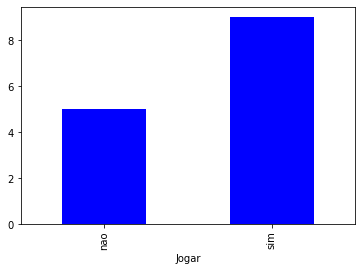

In [290]:
agrupado.plot.bar(color ='blue')

In [291]:
#explorar colunas numéricas
#Temperatura
dataset['Temperatura'].describe()


count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

c:\Users\Alan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Temperatura')

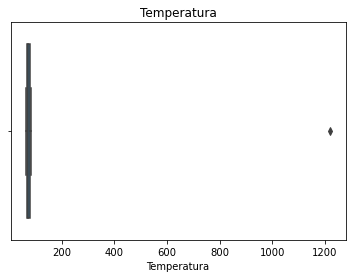

In [292]:
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')


c:\Users\Alan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Temperatura')

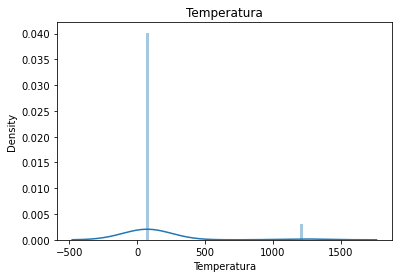

In [293]:
srn.distplot(dataset['Temperatura']).set_title('Temperatura')


In [294]:
#explorar colunas numéricas
#Umidade
dataset['Umidade'].describe()


count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

c:\Users\Alan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Umidade')

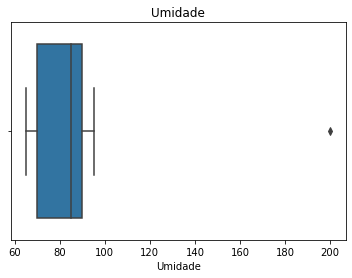

In [295]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')

c:\Users\Alan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Umidade')

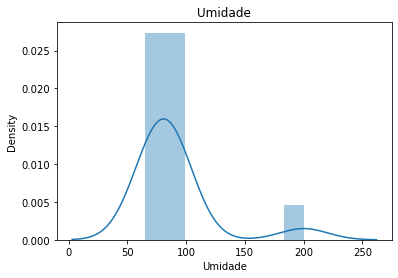

In [296]:
srn.distplot(dataset['Umidade']).set_title('Umidade')

Outro ponto importante e verificar Valores Nulos no dataset

In [297]:
#contamos valores NAN
dataset.isnull().sum()


Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

### Limpeza de dados Coluna Umidade

In [298]:
#umidade, dominio e NAs
agrupado = dataset.groupby(['Umidade']).size()
agrupado

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [299]:
#total de Nas
dataset['Umidade'].isnull().sum()

1

In [300]:
#calular a mediana
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [301]:
#preenche NAs
dataset['Umidade'].fillna(mediana, inplace=True)

In [302]:
dataset['Umidade'].isnull().sum()

0

In [303]:
#visuliza de acordo com o dominio de acordo com o dominio
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]


,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75,200.0,NaN,sim


In [304]:
#atualiza comm mediana
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100), 'Umidade'] = mediana

In [305]:
#visuliza novamente
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


### Limpeza de dados da Coluna Vento

In [306]:
#Ventos
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [307]:
#total de Nas
dataset['Vento'].isnull().sum()

1

In [308]:
#preenche NAs
dataset['Vento'].fillna('FALSO', inplace=True)

In [309]:
#total de Nas
dataset['Vento'].isnull().sum()

0

### Limpeza de dados da Coluna Aparência


In [310]:
#aparencia valor invalido
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [311]:
dataset.loc[dataset['Aparencia'] ==  'menos', 'Aparencia'] = "sol"
#visualiza o resultado
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

### Limpeza de dados da Coluna Temperatura

In [312]:
#temperatura fora do dominio
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [313]:
#visualizar 
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [314]:
#calular a mediana
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [315]:
#substituir
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130), 'Temperatura'] = mediana

In [316]:
#verificamos se ainda existem #verificamos se ainda existem idades fora do domínio
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


## Revendo Gráficos Após Limpeza

Após uma série de análises foi possível encontrar e normalizar várias inconsistências, que poderiam facilmente causar problemas ao usar a base para tomada de decisões ou para criação de modelos preditivos.

In [317]:
#Aparencia
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

<AxesSubplot:xlabel='Aparencia'>

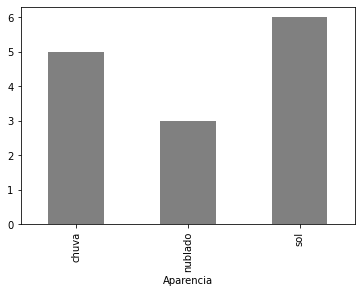

In [318]:
agrupado.plot.bar(color = 'gray')

In [319]:
#explorar dados categoricos
#Temperatura
agrupado = dataset.groupby(['Temperatura']).size()
agrupado

Temperatura
64.0    1
65.0    1
68.0    1
69.0    1
70.0    1
71.0    1
72.0    1
73.5    1
75.0    2
80.0    1
81.0    1
83.0    1
85.0    1
dtype: int64

<AxesSubplot:xlabel='Temperatura'>

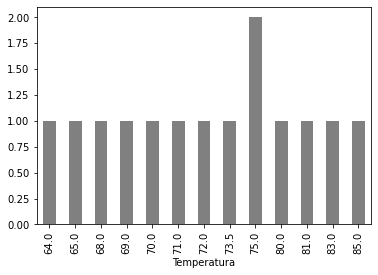

In [320]:
agrupado.plot.bar(color = 'gray')

In [321]:
#explorar dados categoricos
#Umidade
agrupado = dataset.groupby(['Umidade']).size()
agrupado

Umidade
65.0    1
70.0    3
75.0    1
80.0    1
85.0    1
85.5    2
86.0    1
90.0    2
91.0    1
95.0    1
dtype: int64

<AxesSubplot:xlabel='Umidade'>

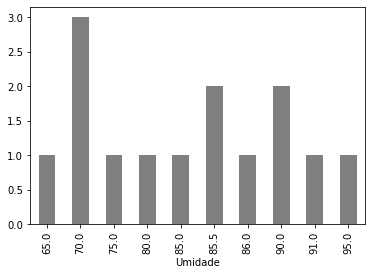

In [322]:
agrupado.plot.bar(color = 'gray')

#### Dessa forma foi possível entender a importância de um processo de análise exploratória, para entender de fato se os dados que serão analisados pertencem aos domínios especificados.